<a href="https://colab.research.google.com/github/esradag/pytorch-derin-ogrenme/blob/main/PytorchS%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Sinir Ağı Sınıflandırması

## Sınıflandırma Problemi Nedir?

[Sınıflandırma problemi](https://tr.wikipedia.org/wiki/%C4%B0statistiksel_s%C4%B1n%C4%B1fland%C4%B1rma), bir şeyin ne olduğunu tahmin etmeyi içerir.

Örneğin, aşağıdaki gibi tahminler yapmak isteyebilirsiniz:

| Problem Türü | Nedir? | Örnek |
| ----- | ----- | ----- |
| **İkili (Binary) Sınıflandırma** | Hedef iki seçenekten biri olabilir, örn. evet veya hayır | Bir kişinin sağlık parametrelerine göre kalp hastalığı olup olmadığını tahmin etmek. |
| **Çoklu (Multi-class) Sınıflandırma** | Hedef ikiden fazla seçenekten biri olabilir | Bir fotoğrafın yiyecek, insan veya köpek olduğunu tahmin etmek. |
| **Çok Etiketli (Multi-label) Sınıflandırma** | Hedef birden fazla seçenekle eşleşebilir | Bir Wikipedia makalesine hangi kategorilerin atanması gerektiğini tahmin etmek (örn. matematik, bilim ve felsefe). |

![Makine öğreniminde ikili sınıflandırma, çoklu sınıflandırma ve çok etiketli sınıflandırma gibi farklı sınıflandırma türleri](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png)

Sınıflandırma, regresyon (bir sayı tahmini, [notebook 01'de](https://www.learnpytorch.io/01_pytorch_workflow/) ele alınmıştır) ile birlikte en yaygın makine öğrenmesi problemlerinden biridir.

Bu not defterinde, PyTorch ile birkaç farklı sınıflandırma problemi üzerinde çalışacağız.

Başka bir deyişle, bir dizi girdiyi alıp bu girdilerin hangi sınıfa ait olduğunu tahmin edeceğiz.


## Neleri Kapsayacağız?

Bu not defterinde, notebook 01'de ele aldığımız PyTorch iş akışını tekrar gözden geçireceğiz.

![Bir PyTorch iş akışı şeması](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

Ancak bu sefer düz bir çizgiyi tahmin etmek (bir sayı tahmini yapmak, yani regresyon problemi) yerine bir **sınıflandırma problemi** üzerinde çalışacağız.

Özellikle şu konuları ele alacağız:

| **Konu** | **İçerik** |
| ----- | ----- |
| **0. Sınıflandırma Sinir Ağının Mimarisi** | Sinir ağları neredeyse her şekilde ve boyutta olabilir, ancak genellikle benzer bir plana sahiptirler. |
| **1. İkili Sınıflandırma Verisini Hazırlama** | Veri hemen hemen her şey olabilir ancak başlamak için basit bir ikili sınıflandırma veri seti oluşturacağız. |
| **2. PyTorch Sınıflandırma Modeli Oluşturma** | Burada verideki desenleri öğrenebilecek bir model oluşturacağız. Ayrıca bir **kayıp fonksiyonu**, **optimizasyon algoritması** seçeceğiz ve sınıflandırmaya özgü bir **eğitim döngüsü** oluşturacağız. |
| **3. Modeli Veriye Uydurma (Eğitim)** | Verimiz ve modelimiz hazır, şimdi modeli verideki (**eğitim**) desenleri bulması için eğitelim. |
| **4. Tahmin Yapma ve Modeli Değerlendirme (Çıkarım)** | Modelimiz veride desenler buldu, şimdi bulduklarını gerçek (**test**) verisiyle karşılaştıralım. |
| **5. Modeli İyileştirme (Model Perspektifinden)** | Modeli eğittik ve değerlendirdik ama iyi çalışmıyor, onu geliştirmek için birkaç yöntem deneyelim. |
| **6. Doğrusal Olmayanlık (Non-linearity)** | Şu ana kadar modelimiz yalnızca düz çizgileri modelleyebildi, peki ya doğrusal olmayan (eğri) çizgiler? |
| **7. Doğrusal Olmayan Fonksiyonları Kopyalama** | **Doğrusal olmayan fonksiyonları** doğrusal olmayan verileri modellemek için kullandık, peki bunlar nasıl görünüyor? |
| **8. Çoklu Sınıflandırma ile Tümünü Birleştirme** | Şimdiye kadar ikili sınıflandırma için yaptıklarımızı çoklu sınıflandırma problemi ile birleştirelim. |


## Nereden Yardım Alabilirsiniz?

Bu kursa ait tüm materyaller [GitHub'da](https://github.com/mrdbourke/pytorch-deep-learning) bulunmaktadır.

Eğer bir sorunla karşılaşırsanız, oradaki [Tartışma sayfasında](https://github.com/mrdbourke/pytorch-deep-learning/discussions) soru sorabilirsiniz.

Ayrıca, PyTorch ile ilgili her konuda oldukça faydalı olan [PyTorch geliştirici forumları](https://discuss.pytorch.org/) da mevcuttur.


## 0. Sınıflandırma Sinir Ağının Mimarisi

Kod yazmaya başlamadan önce, sınıflandırma sinir ağının genel mimarisine bakalım.

| **Hiperparametre** | **İkili Sınıflandırma** | **Çoklu Sınıflandırma** |
| --- | --- | --- |
| **Girdi katmanı şekli** (`in_features`) | Özellik sayısı ile aynı (örneğin, kalp hastalığı tahmininde yaş, cinsiyet, boy, kilo, sigara içme durumu için 5) | İkili sınıflandırma ile aynı |
| **Gizli katman(lar)** | Problemin karmaşıklığına bağlı, minimum = 1, maksimum = sınırsız | İkili sınıflandırma ile aynı |
| **Gizli katman başına nöron sayısı** | Problemin karmaşıklığına bağlı, genellikle 10 ila 512 | İkili sınıflandırma ile aynı |
| **Çıkış katmanı şekli** (`out_features`) | 1 (bir sınıf ya da diğeri) | Her sınıf için 1 (örn. yiyecek, insan veya köpek fotoğrafı için 3) |
| **Gizli katman aktivasyonu** | Genellikle [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (düzeltilmiş doğrusal birim) ancak [başka seçenekler de mevcut](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | İkili sınıflandırma ile aynı |
| **Çıkış aktivasyonu** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) PyTorch'ta) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) PyTorch'ta) |
| **Kayıp fonksiyonu** | [İkili çapraz entropi](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) PyTorch'ta) | Çapraz entropi ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) PyTorch'ta) |
| **Optimizasyon algoritması** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stokastik gradyan inişi), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) ([`torch.optim`](https://pytorch.org/docs/stable/optim.html) daha fazla seçenek için) | İkili sınıflandırma ile aynı |

Elbette, sınıflandırma sinir ağının bu bileşenleri üzerinde çalıştığınız probleme bağlı olarak değişebilir.

Ancak başlamak için fazlasıyla yeterli.

Bu ayarlarla bu not defteri boyunca uygulamalı çalışmalar yapacağız.



## 1. Sınıflandırma Verisi Oluşturma ve Hazırlama

Haydi veri oluşturarak başlayalım.

Farklı renkte noktalardan oluşan iki daire oluşturmak için Scikit-Learn kütüphanesinden [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) metodunu kullanacağız.


In [1]:
from sklearn.datasets import make_circles

# 1000 örnek oluşturuluyor
n_samples = 1000

# Daire verisi oluşturuluyor
X, y = make_circles(n_samples,
                    noise=0.03,  # Noktalara biraz gürültü ekleniyor (veriyi daha gerçekçi hale getirir)
                    random_state=42)  # Aynı sonuçları almak için rastgelelik kontrolü


Haydi oluşturduğumuz verilerin ilk 5 satırını görüntüleyelim.

In [2]:
print(f"İlk 5 X özelliği:\n{X[:5]}")
print(f"\nİlk 5 y etiketi:\n{y[:5]}")


İlk 5 X özelliği:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

İlk 5 y etiketi:
[1 1 1 1 0]


Görünüşe göre her bir `y` değeri için iki adet `X` değeri var.

Veri kaşiflerinin mottosu olan *görselleştir, görselleştir, görselleştir* ilkesini takip ederek bu verileri bir pandas DataFrame'ine aktaralım.


In [3]:
# Daire verisini DataFrame'e dönüştürme
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "etiket": y
})
circles.head(10)


,X1,X2,etiket
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Görünüşe göre her bir `X` özelliği çifti (`X1` ve `X2`), ya 0 ya da 1 olan bir etiket (`y`) değerine sahip.

Bu durum, yalnızca iki seçenek (0 veya 1) olduğu için probleminimizin bir **ikili sınıflandırma** problemi olduğunu gösteriyor.

Her sınıftan kaç tane değer var?


In [4]:
# Farklı etiketleri kontrol et
circles.etiket.value_counts()


,count
etiket,
1,500
0,500


Her sınıftan 500'er tane var, gayet dengeli.

Haydi bunları görselleştirelim.


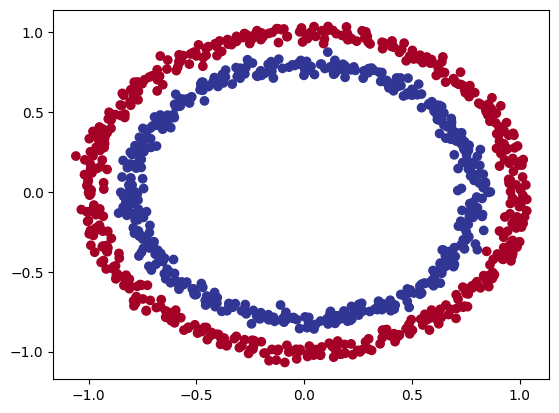

In [5]:
# Grafik ile görselleştirme
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


Tamamdır, çözmemiz gereken bir problemimiz var gibi görünüyor.

Haydi, kırmızı (0) veya mavi (1) noktaları sınıflandırmak için nasıl bir PyTorch sinir ağı oluşturabileceğimizi keşfedelim.

> **Not:** Bu veri seti, makine öğreniminde genellikle bir **oyuncak problem** (deneme ve test amaçlı kullanılan basit problemler) olarak kabul edilir.  
>
> Ancak sınıflandırmanın temelini temsil eder: Sayısal değerlerle ifade edilen bir tür veriye sahipsiniz ve bu veriyi sınıflandırabilen bir model oluşturmak istiyorsunuz. Bizim durumumuzda ise bu modeli kırmızı ve mavi noktaları ayıracak şekilde geliştireceğiz.


### 1.1 Girdi ve Çıktı Şekilleri

Derin öğrenmede en yaygın hatalardan biri **şekil (shape) hatalarıdır**.

Tensörlerin ve tensör işlemlerinin şekillerinin uyuşmaması, modellerinizde hatalara neden olur.

Bu kurs boyunca bu tür hataları sıkça göreceğiz.

Ve bunların hiç yaşanmayacağını garanti etmenin kesin bir yolu yok, mutlaka olacaklar.

Bunun yerine yapabileceğiniz şey, üzerinde çalıştığınız verinin şeklini sürekli olarak anlamaya çalışmaktır.

Ben bunu **girdi ve çıktı şekilleri** olarak adlandırmayı seviyorum.

Kendinize şu soruyu sorun:

"**Girdilerimin şekli ne? Çıktılarımın şekli ne?**"

Haydi bunu keşfedelim.


In [6]:
# Özelliklerimizin ve etiketlerimizin şeklini kontrol et
X.shape, y.shape


((1000, 2), (1000,))

Görünüşe göre her iki dizinin de birinci boyutunda eşleşme var.

1000 adet `X` ve 1000 adet `y` var.

Peki, `X`'in ikinci boyutu nedir?

Tek bir örneğin (özellikler ve etiketler) değerlerini ve şeklini görmek genellikle faydalıdır.

Bunu yapmak, modelinizden bekleyeceğiniz giriş ve çıkış şekillerini anlamanıza yardımcı olacaktır.


In [7]:
# Özelliklerin ve etiketlerin ilk örneğini görüntüleme
X_sample = X[0]
y_sample = y[0]
print(f"Bir X örneğinin değerleri: {X_sample} ve aynı şekilde y: {y_sample}")
print(f"Bir X örneğinin şekli: {X_sample.shape} ve aynı şekilde y: {y_sample.shape}")


Bir X örneğinin değerleri: [0.75424625 0.23148074] ve aynı şekilde y: 1
Bir X örneğinin şekli: (2,) ve aynı şekilde y: ()


Bu bize, `X` için ikinci boyutun iki özelliğe (vektör) sahip olduğunu, `y` için ise tek bir özelliğe (skaler) sahip olduğunu gösteriyor.

Yani bir çıktı için iki girişimiz var.


### 1.2 Veriyi Tensörlere Dönüştürme ve Eğitim/Test Ayrımı Yapma

Verimizin giriş ve çıkış şekillerini inceledik, şimdi PyTorch ile kullanılabilir ve modellemeye hazır hale getirelim.

Özellikle şu adımları gerçekleştireceğiz:
1. Verimizi tensörlere dönüştüreceğiz (şu anda verimiz NumPy dizilerinde ve PyTorch, PyTorch tensörleriyle çalışmayı tercih eder).  
2. Verimizi eğitim ve test setlerine böleceğiz (modeli, `X` ve `y` arasındaki desenleri öğrenmesi için eğitim setinde eğiteceğiz ve ardından bu öğrenilen desenleri test verisinde değerlendireceğiz).


In [8]:
# Veriyi tensörlere dönüştürme
# Aksi takdirde, ileride hesaplamalarda sorunlara neden olabilir
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# İlk beş örneği görüntüleme
X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Artık verimiz tensör formatında, şimdi onu eğitim ve test setlerine bölelim.

Bunun için Scikit-Learn kütüphanesinden [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) fonksiyonunu kullanacağız.

- **`test_size=0.2`** kullanacağız (verinin %80'i eğitim, %20'si test için).  
- Bölünme rastgele gerçekleştiği için sonuçların tekrarlanabilir olması adına **`random_state=42`** ayarlayacağız.


In [9]:
# Veriyi eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # %20 test, %80 eğitim
                                                    random_state=42) # Rastgele bölünmenin tekrarlanabilir olmasını sağlar

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

Harika! Şimdi 800 eğitim örneğimiz ve 200 test örneğimiz var gibi görünüyor.


## 2. Model Oluşturma

Verimizi hazırladık, şimdi bir model oluşturma zamanı.

Bu süreci birkaç adıma ayıracağız:

1. **Cihaza duyarlı kod** ayarlamak (modelimizin CPU veya mevcutsa GPU üzerinde çalışabilmesi için).  
2. `nn.Module` sınıfını genişleterek bir **model oluşturmak**.  
3. **Kayıp fonksiyonu** ve **optimizasyon algoritması** tanımlamak.  
4. Bir **eğitim döngüsü** oluşturmak (bu adımı bir sonraki bölümde yapacağız).  

İyi haber şu ki, bu adımların hepsini daha önce notebook 01'de uygulamıştık.

Bu sefer bu adımları sınıflandırma veri setiyle çalışacak şekilde uyarlayacağız.

Haydi, PyTorch ve `torch.nn` kütüphanesini içe aktararak ve cihaza duyarlı kodu ayarlayarak başlayalım.


In [10]:
# Standart PyTorch içe aktarımları
import torch
from torch import nn

# Cihaza duyarlı kod oluşturma
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

Harika, şimdi `device` ayarlandı. Oluşturduğumuz veri veya modelleri bu cihazda kullanabiliriz ve PyTorch, kullanılabilir durumdaysa GPU'yu, değilse CPU'yu otomatik olarak kullanır.

Şimdi bir model oluşturalım mı?

`X` verimizi giriş olarak alıp, `y` verimizle aynı şekle sahip bir çıktı üretebilecek bir modele ihtiyacımız var.

Başka bir deyişle, verilen `X` (özellikler) ile modelimizin `y` (etiket) tahmini yapmasını istiyoruz.

Bu özellikler ve etiketlerin olduğu kurulum **denetimli öğrenme (supervised learning)** olarak adlandırılır. Çünkü verileriniz, belirli bir girişe karşılık hangi çıkışın olması gerektiğini modelinize bildirir.

Böyle bir model oluşturmak için `X` ve `y`'nin giriş ve çıkış şekillerini işlemesi gerekecek.

Girdi ve çıktı şekillerinin ne kadar önemli olduğunu söylemiştim, şimdi nedenini göreceğiz.

Haydi, şu özelliklere sahip bir model sınıfı oluşturalım:
1. `nn.Module` sınıfını genişletsin (neredeyse tüm PyTorch modelleri `nn.Module` sınıfını genişletir).  
2. `X` ve `y`'nin giriş ve çıkış şekillerini işleyebilen 2 adet `nn.Linear` katmanı oluştursun.  
3. Modelin ileri geçiş (forward pass) hesaplamasını içeren bir `forward()` metodu tanımlasın.  
4. Model sınıfını oluştursun ve hedef `device`a göndersin.


In [11]:
# 1. nn.Module sınıfını genişleten bir model sınıfı oluşturma
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. X ve y'nin giriş ve çıkış şekillerini işleyebilen 2 adet nn.Linear katmanı oluşturma
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # 2 özellik (X) alır, 5 özellik üretir
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # 5 özellik alır, 1 özellik (y) üretir

    # 3. İleri geçiş hesaplamasını içeren forward metodunu tanımlama
    def forward(self, x):
        # layer_2'nin çıktısını döndürür, tek bir özellik, y ile aynı şekil
        return self.layer_2(self.layer_1(x)) # hesaplama önce layer_1'den geçer, ardından layer_1'in çıktısı layer_2'den geçer

# 4. Modelin bir örneğini oluşturma ve hedef cihaza gönderme
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Burada neler oluyor?

Bu adımların bazılarını daha önce gördük.

Tek büyük değişiklik, `self.layer_1` ile `self.layer_2` arasındaki işlemler.

- `self.layer_1`, **2 giriş özelliği** (`in_features=2`) alır ve **5 çıkış özelliği** (`out_features=5`) üretir.  
- Bu, **5 gizli birim (hidden unit)** veya **nöron (neuron)** olarak bilinir.  
- Bu katman, giriş verisini 2 özellikten 5 özelliğe dönüştürür.

### Neden böyle yapıyoruz?

Bu, modelin sadece 2 sayı yerine 5 sayı üzerinden desenleri öğrenmesini sağlar ve *potansiyel olarak* daha iyi çıktılar üretmesine yardımcı olabilir.

*"Potansiyel olarak"* diyorum çünkü bazen işe yaramayabilir.

Sinir ağı katmanlarında kullanabileceğiniz gizli birim sayısı bir **hiperparametredir** (kendiniz belirlediğiniz bir değerdir) ve kesin olarak kullanmanız gereken bir sayı yoktur.

Genel olarak daha fazla nöron daha iyidir ancak **fazlası da zararlı** olabilir. Seçtiğiniz miktar, model türüne ve çalıştığınız veri setine bağlıdır.

Bizim veri setimiz küçük ve basit olduğu için küçük tutacağız.

### Gizli Birimler İçin Tek Kural:

Sonraki katman, yani bizim örneğimizde `self.layer_2`, önceki katmanın `out_features` değeriyle aynı `in_features` değerine sahip olmalıdır.

Bu yüzden `self.layer_2`, `in_features=5` olarak ayarlanmıştır. Çünkü `self.layer_1`'den gelen `out_features=5` değerlerini alır ve bunlara doğrusal bir işlem uygular, sonucu `out_features=1` olarak dönüştürür (bu da `y` ile aynı şekildedir).

![Lineer aktivasyonlu sınıflandırma sinir ağına görsel bir örnek](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)  
*Az önce oluşturduğumuz modele benzer bir sınıflandırma sinir ağının görsel bir örneği. Kendi modelinizi [TensorFlow Playground](https://playground.tensorflow.org/) sitesinde deneyebilirsiniz.*

Yukarıdakini [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) kullanarak da gerçekleştirebilirsiniz.

`nn.Sequential`, giriş verisini katmanlar boyunca sırayla geçirerek ileri geçiş (forward pass) işlemini gerçekleştirir.


In [12]:
# CircleModelV0 modelini nn.Sequential ile çoğaltma
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Vay canına, bu `nn.Module` sınıfını genişletmekten çok daha basit görünüyor. Peki neden her zaman `nn.Sequential` kullanmıyoruz?

`nn.Sequential`, basit ve düz hesaplamalar için harikadır. Ancak isminden de anlaşılacağı gibi, işlemleri *her zaman* sırayla (ardışık olarak) gerçekleştirir.

Bu nedenle, düz ve sıralı bir hesaplamadan farklı bir şey yapmak isterseniz, kendi özel `nn.Module` alt sınıfınızı tanımlamanız gerekir.

Şimdi bir modelimiz olduğuna göre, üzerinden biraz veri geçirdiğimizde neler olacağını görelim.


In [13]:
# Model ile tahminler yapma
untrained_preds = model_0(X_test.to(device))
print(f"Tahminlerin uzunluğu: {len(untrained_preds)}, Şekli: {untrained_preds.shape}")
print(f"Test örneklerinin uzunluğu: {len(y_test)}, Şekli: {y_test.shape}")
print(f"\nİlk 10 tahmin:\n{untrained_preds[:10]}")
print(f"\nİlk 10 test etiketi:\n{y_test[:10]}")


Tahminlerin uzunluğu: 200, Şekli: torch.Size([200, 1])
Test örneklerinin uzunluğu: 200, Şekli: torch.Size([200])

İlk 10 tahmin:
tensor([[-0.4922],
        [-0.4145],
        [-0.5851],
        [-0.4663],
        [-0.4092],
        [-0.3631],
        [-0.2837],
        [-0.2712],
        [-0.5924],
        [-0.4073]], grad_fn=<SliceBackward0>)

İlk 10 test etiketi:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Hmm, görünen o ki tahminlerin sayısı ile test etiketlerinin sayısı aynı ancak tahminler, test etiketleriyle aynı biçim veya şekilde değil.

Bunu düzeltmek için uygulayabileceğimiz birkaç adım var, bunları ilerleyen bölümlerde göreceğiz.


### 2.1 Kayıp Fonksiyonu ve Optimizasyon Algoritması Kurulumu

Daha önce [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-a-loss-function-and-optimizer-in-pytorch)'de bir kayıp fonksiyonu (criterion veya maliyet fonksiyonu) ve optimizasyon algoritması oluşturmuştuk.

Ancak farklı problem türleri için farklı kayıp fonksiyonları gerekir.

Örneğin:
- **Regresyon problemleri** (bir sayı tahmini) için ortalama mutlak hata (MAE) kaybı kullanılır.  
- **İkili sınıflandırma problemleri** (bizimki gibi) için genellikle [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) kayıp fonksiyonu kullanılır.  

Buna karşılık, aynı optimizasyon algoritması farklı problem türlerinde sıklıkla kullanılabilir.  
Örneğin:
- **Stochastic Gradient Descent (SGD)** ve **Adam** optimizer'ları hem sınıflandırma hem de regresyon problemlerinde kullanılabilir.

| **Kayıp Fonksiyonu/Optimizasyon Algoritması** | **Problem Türü** | **PyTorch Kodu** |
| -------------------------------------------- | ---------------- | ---------------- |
| Stochastic Gradient Descent (SGD) optimizer  | Sınıflandırma, regresyon, vb. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer                               | Sınıflandırma, regresyon, vb. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss                    | İkili sınıflandırma | [`torch.nn.BCEWithLogitsLoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) veya [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss                           | Çoklu sınıflandırma | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) veya L1 Loss      | Regresyon | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Mean squared error (MSE) veya L2 Loss       | Regresyon | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |

*Farklı kayıp fonksiyonları ve optimizasyon algoritmalarının bir özeti. Daha fazlası mevcut ancak bunlar en sık kullanılanlardan bazılarıdır.*

### **Bizim için en uygun kayıp fonksiyonu nedir?**

İkili sınıflandırma problemi üzerinde çalıştığımız için **binary cross entropy** kaybı kullanacağız.

> **Not:** **Kayıp fonksiyonu**, modelinizin tahminlerinin ne kadar *yanlış* olduğunu ölçer. Kayıp ne kadar yüksekse, modeliniz o kadar kötü demektir.

PyTorch'ta iki farklı binary cross entropy implementasyonu vardır:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html): Hedef (etiket) ve giriş (özellikler) arasındaki binary cross entropy kaybını hesaplar.  
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html): Yukarıdakinin aynısıdır ancak içine gömülü bir sigmoid katmanına sahiptir ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)).

**Hangisini kullanmalıyız?**  
Dokümana göre [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html), `nn.Sigmoid` katmanından sonra `torch.nn.BCELoss()` kullanmaktan daha sayısal olarak kararlıdır. Bu nedenle genellikle ikinci yöntem tercih edilir.

Bu bilgileri göz önünde bulundurarak bir kayıp fonksiyonu ve optimizasyon algoritması oluşturalım.

Optimizasyon için `torch.optim.SGD()` kullanacağız ve öğrenme oranını `0.1` olarak ayarlayacağız.

> **Not:** [`nn.BCELoss` ve `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4) kullanımı hakkında PyTorch forumlarında bir tartışma var. Başta kafa karıştırıcı olabilir ancak pratik yaptıkça daha anlaşılır hale gelecektir.


In [14]:
# Kayıp fonksiyonu oluşturma
# loss_fn = nn.BCELoss() # BCELoss = sigmoid yerleşik değil
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid yerleşik

# Optimizasyon algoritması oluşturma
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


Şimdi bir **değerlendirme metriği** oluşturalım.

Değerlendirme metriği, modelinizin nasıl performans gösterdiğine dair farklı bir bakış açısı sunar.

Eğer kayıp fonksiyonu modelinizin ne kadar *yanlış* olduğunu ölçüyorsa, değerlendirme metriklerini modelinizin ne kadar *doğru* olduğunu ölçen bir araç olarak düşünebilirsiniz.

Tabii ki, her iki yöntem de benzer şeyleri ölçüyor gibi görünebilir ancak değerlendirme metrikleri farklı bir perspektif sunar.

Sonuçta, modellerinizi değerlendirirken durumu farklı açılardan görmek önemlidir.

Sınıflandırma problemleri için kullanılabilecek birkaç değerlendirme metriği vardır ancak **doğruluk (accuracy)** ile başlayalım.

Doğruluk, doğru tahminlerin toplam tahmin sayısına bölünmesiyle ölçülür.

Örneğin, 100 tahminin 99'u doğruysa, modelin doğruluğu %99 olur.

Haydi bunun için bir fonksiyon yazalım.


In [15]:
# Doğruluğu Hesaplama (Bir Sınıflandırma Metriği)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() iki tensörün eşit olduğu yerleri hesaplar
    acc = (correct / len(y_pred)) * 100
    return acc


Harika! Artık bu fonksiyonu modelimizi eğitirken kayıpla birlikte performansını ölçmek için kullanabiliriz.


## 3. Modeli Eğitme

Tamam, artık bir kayıp fonksiyonumuz ve optimizasyon algoritmamız hazır olduğuna göre, modelimizi eğitelim.

PyTorch eğitim döngüsündeki adımları hatırlıyor musunuz?

Hatırlamıyorsanız, işte bir hatırlatma:

### Eğitimin Adımları:

<details>
    <summary>PyTorch Eğitim Döngüsü Adımları</summary>
    <ol>
        <li><b>İleri geçiş (Forward pass)</b> - Model, tüm eğitim verisinden bir kez geçerek
            <code>forward()</code> fonksiyonunu çalıştırır (<code>model(x_train)</code>).
        </li>
        <li><b>Kayıp hesaplama</b> - Modelin çıktıları (tahminler) gerçek değerlerle karşılaştırılır ve
            ne kadar yanlış oldukları değerlendirilir (<code>loss = loss_fn(y_pred, y_train)</code>).
        </li>
        <li><b>Gradyanları sıfırlama</b> - Optimizasyon algoritmasının gradyanları sıfırlanır (varsayılan olarak gradyanlar birikir),
            böylece belirli bir eğitim adımı için yeniden hesaplanabilir (<code>optimizer.zero_grad()</code>).
        </li>
        <li><b>Kayıp üzerinde geri yayılım (Backpropagation) yapma</b> - Kayıp fonksiyonunun model parametreleriyle olan gradyanları hesaplanır.
            Bu işleme <b>geri yayılım (backpropagation)</b> denir (<code>loss.backward()</code>).
        </li>
        <li><b>Optimizasyonu güncelleme (Gradient Descent)</b> - Kayıp gradyanlarına göre parametreler güncellenir
            (<code>optimizer.step()</code>).
        </li>
    </ol>
</details>


### 3.1 Ham Model Çıktılarından Tahmin Etiketlerine Geçiş (Logitler -> Tahmin Olasılıkları -> Tahmin Etiketleri)

Eğitim döngüsü adımlarına geçmeden önce, ileri geçiş (forward pass) sırasında modelimizden ne çıktığını görelim (`forward()` metodu tarafından tanımlanır).

Bunu yapmak için modele biraz veri verelim.


In [16]:
# Test verisi üzerinde ileri geçişin ilk 5 çıktısını görüntüleme
y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.4922],
        [-0.4145],
        [-0.5851],
        [-0.4663],
        [-0.4092]], grad_fn=<SliceBackward0>)

Modelimiz henüz eğitilmediği için bu çıktılar temelde rastgele.

Peki *bunlar nedir*?

Bunlar, `forward()` metodumuzun çıktılarıdır.

Bu metot, şu denklemi uygulayan iki adet `nn.Linear()` katmanı içerir:

$$
\mathbf{y} = x \cdot \mathbf{Weights}^T + \mathbf{bias}
$$

Bu denklemin (*işlenmemiş*) çıktıları ($\mathbf{y}$) ve dolayısıyla modelimizin ham çıktıları genellikle [**logitler**](https://datascience.stackexchange.com/a/31045) olarak adlandırılır.

Yani modelimiz yukarıda, giriş verisini ($x$ denklemi veya kodda `X_test`) aldığında **logitler** üretir.

Ancak bu sayılar yorumlamak için zordur.

Gerçek etiketlerimizle karşılaştırılabilir değerler isteriz.

Modelimizin ham çıktısını (logitleri) bu forma dönüştürmek için [sigmoid aktivasyon fonksiyonunu](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) kullanabiliriz.

Haydi bunu deneyelim.


In [17]:
# Model logitleri üzerinde sigmoid kullanma
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.3794],
        [0.3978],
        [0.3578],
        [0.3855],
        [0.3991]], grad_fn=<SigmoidBackward0>)

Tamam, şimdi çıktılar belirli bir tutarlılığa sahip gibi görünüyor (hala rastgele olsalar da).

Bunlar artık **tahmin olasılıkları** biçiminde (genellikle bunlara `y_pred_probs` diyorum), yani bu değerler modelin bir veri noktasının hangi sınıfa ait olduğunu düşündüğünü gösteriyor.

Bizim durumumuzda, ikili sınıflandırma problemi üzerinde çalıştığımız için ideal çıktılarımız 0 veya 1'dir.

Bu değerler bir karar sınırı olarak değerlendirilebilir.

- 0'a ne kadar yakınsa, model örneğin sınıf 0'a ait olduğunu o kadar fazla düşünüyor.  
- 1'e ne kadar yakınsa, model örneğin sınıf 1'e ait olduğunu o kadar fazla düşünüyor.

Daha spesifik olarak:
* Eğer `y_pred_probs` >= 0.5 ise, `y=1` (sınıf 1)  
* Eğer `y_pred_probs` < 0.5 ise, `y=0` (sınıf 0)  

Tahmin olasılıklarını tahmin etiketlerine dönüştürmek için sigmoid aktivasyon fonksiyonunun çıktısını yuvarlayabiliriz.


In [18]:
# Tahmin edilen etiketleri bulma (tahmin olasılıklarını yuvarlama)
y_preds = torch.round(y_pred_probs)

# Tam hali
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Eşitlik kontrolü
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Ekstra boyuttan kurtulma
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

Harika! Şimdi modelimizin tahminleri, gerçek etiketlerimiz (`y_test`) ile aynı formatta görünüyor.


In [19]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

Bu, modelimizin tahminlerini test etiketleriyle karşılaştırarak performansını değerlendirebileceğimiz anlamına geliyor.

Özetlemek gerekirse, modelimizin ham çıktıları (logitler) sigmoid aktivasyon fonksiyonu kullanılarak tahmin olasılıklarına dönüştürüldü.

Daha sonra, tahmin olasılıkları yuvarlanarak tahmin etiketlerine dönüştürüldü.

> **Not:** Sigmoid aktivasyon fonksiyonu genellikle yalnızca ikili sınıflandırma logitleri için kullanılır. Çoklu sınıflandırma problemleri için [softmax aktivasyon fonksiyonu](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) kullanılacaktır (bunu ilerleyen bölümlerde göreceğiz).  
>
> Ayrıca, modelimizin ham çıktıları `nn.BCEWithLogitsLoss` fonksiyonuna aktarılırken sigmoid aktivasyon fonksiyonunun kullanılması gerekmez. Çünkü bu kayıp fonksiyonunun içine sigmoid yerleşiktir. ("logits" ifadesi, bu kayıp fonksiyonunun modelin ham logit çıktılarıyla çalıştığını gösterir).


### 3.2 Eğitim ve Test Döngüsü Oluşturma

Tamam, modelimizin ham çıktılarından tahmin etiketleri elde etmenin nasıl olduğunu konuştuk. Şimdi bir eğitim döngüsü oluşturalım.

Başlangıç olarak, modelimizi **100 epoch** boyunca eğitelim ve her **10 epoch**'da bir modelin ilerlemesini çıktılayalım.


In [20]:
torch.manual_seed(42)

# Epoch sayısını belirleme
epochs = 100

# Veriyi hedef cihaza aktarma
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Eğitim ve değerlendirme döngüsü oluşturma
for epoch in range(epochs):
    ### Eğitim
    model_0.train()

    # 1. İleri geçiş (model ham logitleri üretir)
    y_logits = model_0(X_train).squeeze()  # Ekstra `1` boyutlarını kaldırmak için squeeze, model ve veri aynı cihazda olmalı
    y_pred = torch.round(torch.sigmoid(y_logits))  # logitler -> tahmin olasılıkları -> tahmin etiketleri

    # 2. Kayıp/doğruluk hesaplama
    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss kullanırken torch.sigmoid() gerekir
    #                y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss ham logitlerle çalışır
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizasyon gradyanlarını sıfırlama
    optimizer.zero_grad()

    # 4. Geri yayılım (backpropagation)
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_0.eval()
    with torch.inference_mode():
        # 1. İleri geçiş
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Kayıp/doğruluk hesaplama
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Her 10 epoch'da bir durumu yazdırma
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Kayıp: {loss:.5f}, Doğruluk: {acc:.2f}% | Test kaybı: {test_loss:.5f}, Test doğruluğu: {test_acc:.2f}%")


Epoch: 0 | Kayıp: 0.71949, Doğruluk: 50.00% | Test kaybı: 0.71965, Test doğruluğu: 50.00%
Epoch: 10 | Kayıp: 0.70308, Doğruluk: 50.00% | Test kaybı: 0.70461, Test doğruluğu: 50.00%
Epoch: 20 | Kayıp: 0.69715, Doğruluk: 50.00% | Test kaybı: 0.69903, Test doğruluğu: 50.00%
Epoch: 30 | Kayıp: 0.69484, Doğruluk: 43.88% | Test kaybı: 0.69680, Test doğruluğu: 41.00%
Epoch: 40 | Kayıp: 0.69391, Doğruluk: 47.38% | Test kaybı: 0.69583, Test doğruluğu: 43.50%
Epoch: 50 | Kayıp: 0.69350, Doğruluk: 47.75% | Test kaybı: 0.69539, Test doğruluğu: 49.50%
Epoch: 60 | Kayıp: 0.69332, Doğruluk: 48.38% | Test kaybı: 0.69516, Test doğruluğu: 48.50%
Epoch: 70 | Kayıp: 0.69323, Doğruluk: 49.25% | Test kaybı: 0.69502, Test doğruluğu: 48.50%
Epoch: 80 | Kayıp: 0.69318, Doğruluk: 49.62% | Test kaybı: 0.69493, Test doğruluğu: 49.50%
Epoch: 90 | Kayıp: 0.69314, Doğruluk: 50.12% | Test kaybı: 0.69487, Test doğruluğu: 49.50%


Hmm, modelimizin performansı hakkında ne fark ettiniz?

Görünüşe göre modelimiz eğitim ve test adımlarını sorunsuz tamamladı ancak sonuçlar pek değişmiş gibi görünmüyor.

Doğruluk oranı her veri bölmesinde %50'nin üzerine neredeyse çıkmıyor.

Ve dengeli bir ikili sınıflandırma problemi üzerinde çalıştığımız için, modelimiz rastgele tahmin yapıyormuş gibi performans gösteriyor.  
(500 adet sınıf 0 ve 500 adet sınıf 1 olduğunda, model sürekli olarak sınıf 1 tahmini yaparsa %50 doğruluk elde eder).


## 4. Tahmin Yapma ve Modeli Değerlendirme

Metriklere bakıldığında, modelimiz rastgele tahmin yapıyor gibi görünüyor.

Peki bunu daha ayrıntılı nasıl inceleyebiliriz?

Aklıma harika bir fikir geldi!

**Veri kaşiflerinin mottosu!**

*"Görselleştir, görselleştir, görselleştir!"*

Modelimizin tahminlerini, tahmin etmeye çalıştığı verileri ve bir şeyin sınıf 0 mı yoksa sınıf 1 mi olduğuna karar verdiği karar sınırını gösteren bir grafik oluşturalım.

Bunu yapmak için, [Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning) deposundaki
[`helper_functions.py` dosyasını](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) indirip içe aktaracak bir kod yazacağız.

Bu dosya, modelimizin belirli sınıfları tahmin ettiği farklı noktaları görsel olarak çizmek için NumPy meshgrid oluşturan
`plot_decision_boundary()` adlı kullanışlı bir fonksiyon içeriyor.

Ayrıca, daha sonra kullanmak üzere notebook 01'de yazdığımız `plot_predictions()` fonksiyonunu da içe aktaracağız.


In [21]:
import requests
from pathlib import Path

# Learn PyTorch deposundan yardımcı fonksiyonları indir (eğer daha önce indirilmediyse)
if Path("helper_functions.py").is_file():
  print("helper_functions.py zaten mevcut, indirme atlanıyor")
else:
  print("helper_functions.py indiriliyor")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py indiriliyor


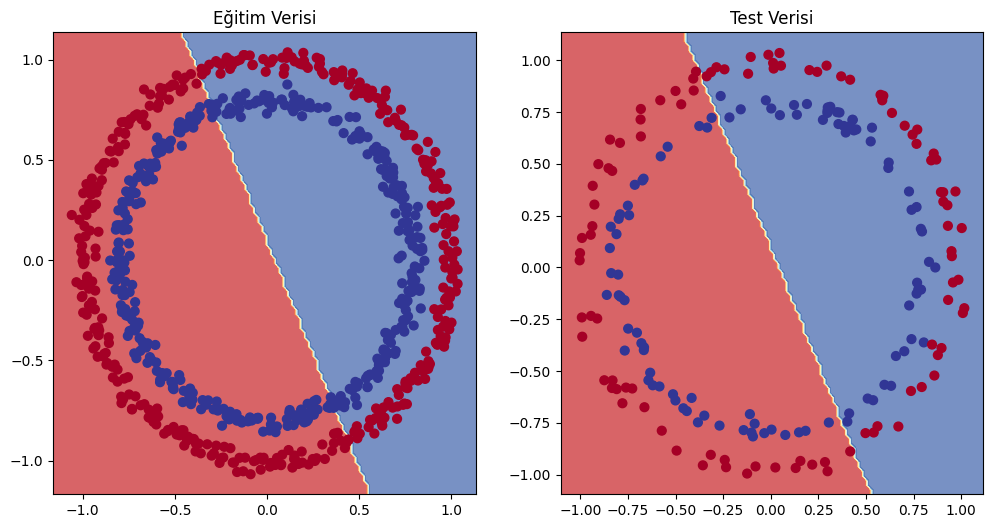

In [22]:
# Eğitim ve test setleri için karar sınırlarını görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Eğitim Verisi")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test Verisi")
plot_decision_boundary(model_0, X_test, y_test)


Vay canına! Görünüşe göre modelimizin performans sorununun nedenini bulduk.

Model şu anda kırmızı ve mavi noktaları düz bir çizgiyle ayırmaya çalışıyor...

Bu da %50 doğruluğu açıklıyor. Çünkü verimiz dairesel olduğu için düz bir çizgi en fazla veriyi ortadan ikiye bölebilir.

Makine öğrenmesi terimleriyle, modelimiz şu anda **az öğreniyor (underfitting)**, yani veriden tahmin edici desenleri öğrenemiyor.

Peki bunu nasıl iyileştirebiliriz?


## 5. Modeli İyileştirme (Model Perspektifinden)

Haydi modelimizin **underfitting (az öğrenme)** sorununu çözmeye çalışalım.

Veriye değil de **modele** odaklanarak bunu iyileştirmenin birkaç yolu var:

| **Model İyileştirme Tekniği** | **Ne Yapar?** |
| ----------------------------- | ------------- |
| **Daha fazla katman ekleme**  | Her katman, veride yeni desenler öğrenme potansiyelini artırır. Daha fazla katman, sinir ağınızı *daha derin* hale getirir. |
| **Daha fazla gizli birim ekleme** | Her katmanda daha fazla gizli birim, modelin öğrenme kapasitesini artırabilir. Daha fazla gizli birim, sinir ağınızı *daha geniş* hale getirir. |
| **Daha uzun süre eğitme (daha fazla epoch)** | Modeliniz veriyi daha fazla görseydi, belki daha iyi öğrenebilirdi. |
| **Aktivasyon fonksiyonlarını değiştirme** | Bazı veriler sadece düz çizgilerle ayrılamaz (bizim örneğimizde olduğu gibi). Doğrusal olmayan aktivasyon fonksiyonları bu sorunu çözebilir. |
| **Öğrenme oranını değiştirme** | Daha az model odaklı ama yine de önemli. Optimizasyon algoritmasının öğrenme oranı, modelin her adımda parametrelerini ne kadar değiştireceğini belirler. Çok yüksek olursa model aşırı düzeltir, çok düşük olursa yeterince öğrenemez. |
| **Kayıp fonksiyonunu değiştirme** | Farklı problemler farklı kayıp fonksiyonları gerektirir. Örneğin, ikili çapraz entropi kaybı çoklu sınıflandırma problemi için uygun değildir. |
| **Transfer öğrenme kullanma** | Benzer bir problem için önceden eğitilmiş bir modeli alıp kendi probleminize uyarlayın. Transfer öğrenmeyi [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/)'da ele alıyoruz. |

> **Not:** *Bu parametrelerin hepsini manuel olarak ayarlayabildiğiniz için bunlara **hiperparametre** denir.*  
>
> Ayrıca makine öğrenmesinin yarı sanat yarı bilim olduğunu unutmayın. Projeniz için en iyi değer kombinasyonunu bulmanın kesin bir yolu yoktur. Veri bilimcilerin mottosu olan "deney, deney, deney"i takip etmek en iyisidir.

Haydi modelimize fazladan bir katman ekleyelim, eğitim süresini uzatalım (`epochs=100` yerine `epochs=1000`) ve gizli birim sayısını `5`ten `10`a çıkaralım.

Yukarıda yaptığımız adımları, birkaç hiperparametre değiştirerek tekrar uygulayacağız.


In [23]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)  # Giriş katmanı (2 giriş, 10 çıkış)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # Ekstra gizli katman
        self.layer_3 = nn.Linear(in_features=10, out_features=1)  # Çıkış katmanı (1 çıkış)

    def forward(self, x):  # Dikkat: `forward` metodunun doğru yazıldığından emin olun!
        # Bu model aşağıdakiyle aynı işlevi görür:
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

# Modelin bir örneğini oluşturup hedef cihaza gönderiyoruz
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Şimdi yeni bir modelimiz olduğuna göre, daha önce kullandığımız ayarlarla aynı şekilde bir kayıp fonksiyonu ve optimizasyon algoritması oluşturalım.


In [24]:
# loss_fn = nn.BCELoss() # Girdi üzerinde sigmoid gerektirir
loss_fn = nn.BCEWithLogitsLoss() # Girdi üzerinde sigmoid gerektirmez
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


Harika, model, optimizasyon algoritması ve kayıp fonksiyonu hazır. Şimdi bir eğitim döngüsü oluşturalım.

Bu sefer modeli daha uzun süre eğiteceğiz (`epochs=1000` yerine `epochs=100`) ve bunun modelimizi iyileştirip iyileştirmediğine bakacağız.


In [25]:
torch.manual_seed(42)

epochs = 1000  # Daha uzun eğitim süresi

# Veriyi hedef cihaza gönderme
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Eğitim
    # 1. İleri geçiş (Forward pass)
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> tahmin olasılıkları -> tahmin etiketleri

    # 2. Kayıp/Doğruluk hesaplama
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Gradyanları sıfırlama
    optimizer.zero_grad()

    # 4. Geri yayılım (Backpropagation)
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_1.eval()
    with torch.inference_mode():
        # 1. İleri geçiş (Forward pass)
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Kayıp/Doğruluk hesaplama
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Her 100 epoch'da bir sonucu yazdırma
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Kayıp: {loss:.5f}, Doğruluk: {acc:.2f}% | Test kaybı: {test_loss:.5f}, Test doğruluğu: {test_acc:.2f}%")


Epoch: 0 | Kayıp: 0.69396, Doğruluk: 50.88% | Test kaybı: 0.69261, Test doğruluğu: 51.00%
Epoch: 100 | Kayıp: 0.69305, Doğruluk: 50.38% | Test kaybı: 0.69379, Test doğruluğu: 48.00%
Epoch: 200 | Kayıp: 0.69299, Doğruluk: 51.12% | Test kaybı: 0.69437, Test doğruluğu: 46.00%
Epoch: 300 | Kayıp: 0.69298, Doğruluk: 51.62% | Test kaybı: 0.69458, Test doğruluğu: 45.00%
Epoch: 400 | Kayıp: 0.69298, Doğruluk: 51.12% | Test kaybı: 0.69465, Test doğruluğu: 46.00%
Epoch: 500 | Kayıp: 0.69298, Doğruluk: 51.00% | Test kaybı: 0.69467, Test doğruluğu: 46.00%
Epoch: 600 | Kayıp: 0.69298, Doğruluk: 51.00% | Test kaybı: 0.69468, Test doğruluğu: 46.00%
Epoch: 700 | Kayıp: 0.69298, Doğruluk: 51.00% | Test kaybı: 0.69468, Test doğruluğu: 46.00%
Epoch: 800 | Kayıp: 0.69298, Doğruluk: 51.00% | Test kaybı: 0.69468, Test doğruluğu: 46.00%
Epoch: 900 | Kayıp: 0.69298, Doğruluk: 51.00% | Test kaybı: 0.69468, Test doğruluğu: 46.00%


Ne? Modelimiz daha uzun süre eğitildi ve fazladan bir katman eklendi ama yine de rastgele tahminden daha iyi desenler öğrenmemiş gibi görünüyor.

Haydi bunu görselleştirelim.


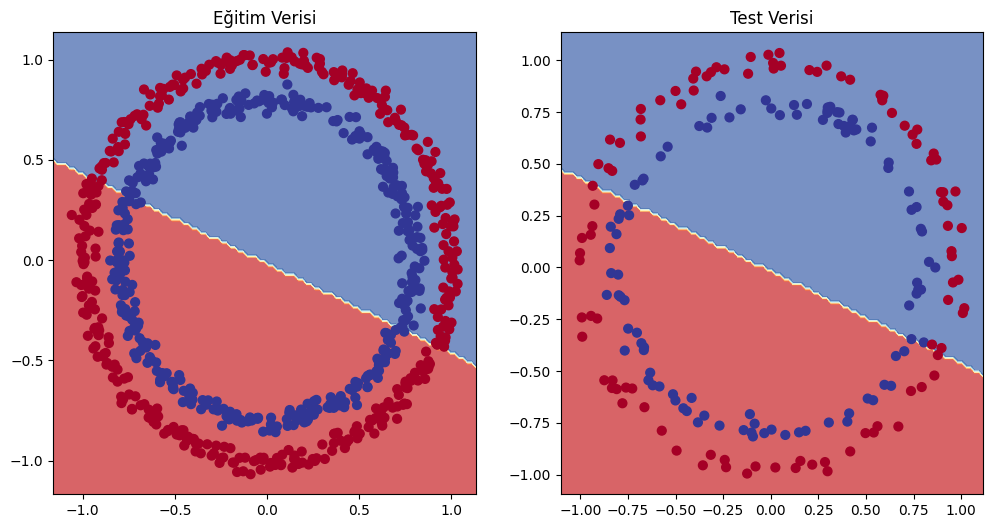

In [26]:
# Eğitim ve test setleri için karar sınırlarını görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Eğitim Verisi")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test Verisi")
plot_decision_boundary(model_1, X_test, y_test)


Hmmm.

Modelimiz hâlâ kırmızı ve mavi noktalar arasında düz bir çizgi çiziyor.

Modelimiz düz bir çizgi çiziyorsa, doğrusal veriyi modelleyebilir mi? Tıpkı [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)'de yaptığımız gibi?


### 5.1 Modelimizin Düz Bir Çizgiyi Modelleyip Modelleyemeyeceğini Test Etmek İçin Veri Hazırlama

Modelimizin doğrusal veriyi modelleyip modelleyemeyeceğini görmek için biraz doğrusal veri oluşturalım.  
Böylece modelimizin gerçekten hiçbir şey öğrenemeyen bir model olup olmadığını test edebiliriz.


In [27]:
# Veri oluşturma (notebook 01 ile aynı)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Veriyi oluşturma
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias  # Doğrusal regresyon formülü

# Veriyi kontrol etme
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

Harika, şimdi verimizi eğitim ve test setlerine ayıralım.


In [28]:
# Eğitim ve test setlerini oluşturma
train_split = int(0.8 * len(X_regression))  # Verinin %80'i eğitim seti için ayrılıyor
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Her bir setin uzunluklarını kontrol etme
print(len(X_train_regression),
      len(y_train_regression),
      len(X_test_regression),
      len(y_test_regression))


80 80 20 20


Harika, şimdi verinin nasıl göründüğüne bakalım.

Bunu yapmak için notebook 01'de oluşturduğumuz `plot_predictions()` fonksiyonunu kullanacağız.

Bu fonksiyon, daha önce indirdiğimiz Learn PyTorch for Deep Learning deposundaki
[`helper_functions.py`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) dosyasında yer alıyor.


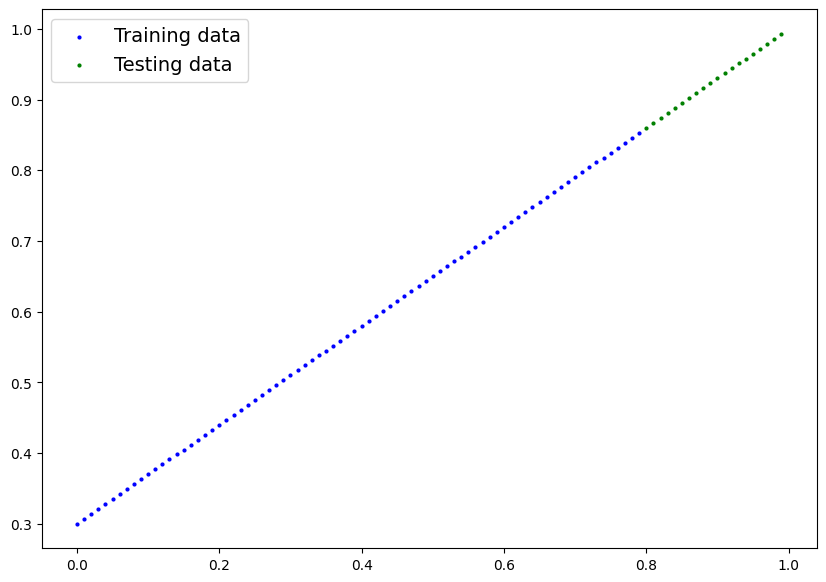

In [29]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);


### 5.2 `model_1`'i Doğrusal Veriye Uygun Hale Getirme

Artık elimizde bir veri seti var, şimdi `model_1` modelimizi regresyon verimize uygun bir kayıp fonksiyonu ile yeniden oluşturalım.


In [30]:
# model_1 ile aynı mimari (ancak nn.Sequential kullanılıyor)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),  # Giriş katmanı (1 giriş, 10 çıkış)
    nn.Linear(in_features=10, out_features=10), # Gizli katman (10 giriş, 10 çıkış)
    nn.Linear(in_features=10, out_features=1)   # Çıkış katmanı (1 çıkış)
).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

Kayıp fonksiyonunu **`nn.L1Loss()`** (ortalama mutlak hata ile aynı) olarak ve optimizasyon algoritmasını **`torch.optim.SGD()`** olarak ayarlayacağız.


In [31]:
# Kayıp fonksiyonu ve optimizasyon algoritması
loss_fn = nn.L1Loss()  # Ortalama Mutlak Hata (MAE) kayıp fonksiyonu
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)  # Stokastik Gradyan İnişi (SGD) optimizasyonu


Haydi şimdi modeli, `epochs=1000` olacak şekilde klasik eğitim döngüsü adımlarını kullanarak eğitelim (tıpkı `model_1`'de olduğu gibi).

> **Not:** Sürekli olarak benzer eğitim döngüsü kodlarını yazıyoruz. Bunu bilinçli olarak yaptım, pratik yapmak için.  
> Ancak, bunu nasıl fonksiyon haline getirebileceğimiz hakkında bir fikrin var mı?  
> Bu yaklaşım gelecekte kod yazarken önemli ölçüde zaman kazandırabilir.  
> Belki bir **eğitim fonksiyonu** ve bir **test fonksiyonu** yazılabilir.


In [32]:
# Modeli Eğitme
torch.manual_seed(42)

# Epoch sayısını belirleme
epochs = 1000

# Veriyi hedef cihaza gönderme
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Eğitim
    # 1. İleri geçiş
    y_pred = model_2(X_train_regression)

    # 2. Kayıp hesaplama (doğruluk yok çünkü bu bir regresyon problemi, sınıflandırma değil)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizasyon gradyanlarını sıfırlama
    optimizer.zero_grad()

    # 4. Geri yayılım (backpropagation)
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_2.eval()
    with torch.inference_mode():
        # 1. İleri geçiş
        test_pred = model_2(X_test_regression)
        # 2. Kayıp hesaplama
        test_loss = loss_fn(test_pred, y_test_regression)

    # Durumları yazdırma
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Eğitim kaybı: {loss:.5f}, Test kaybı: {test_loss:.5f}")


Epoch: 0 | Eğitim kaybı: 0.75986, Test kaybı: 0.54143
Epoch: 100 | Eğitim kaybı: 0.09309, Test kaybı: 0.02901
Epoch: 200 | Eğitim kaybı: 0.07376, Test kaybı: 0.02850
Epoch: 300 | Eğitim kaybı: 0.06745, Test kaybı: 0.00615
Epoch: 400 | Eğitim kaybı: 0.06107, Test kaybı: 0.02004
Epoch: 500 | Eğitim kaybı: 0.05698, Test kaybı: 0.01061
Epoch: 600 | Eğitim kaybı: 0.04857, Test kaybı: 0.01326
Epoch: 700 | Eğitim kaybı: 0.06109, Test kaybı: 0.02127
Epoch: 800 | Eğitim kaybı: 0.05600, Test kaybı: 0.01425
Epoch: 900 | Eğitim kaybı: 0.05571, Test kaybı: 0.00603


Tamam, `model_1`'in sınıflandırma verisinde olduğu gibi, bu sefer `model_2`'nin kaybı gerçekten azalıyor gibi görünüyor.

Tahminlerini görmek için bunu görselleştirelim.

Unutmayın, çünkü modelimiz ve verimiz hedef **cihazda** çalışıyor ve bu cihaz bir GPU olabilir, ancak bizim görselleştirme fonksiyonumuz **matplotlib** kullanıyor ve matplotlib GPU üzerindeki verileri işleyemez.

Bunu halletmek için, veriyi **.cpu()** ile CPU'ya göndereceğiz ve ardından `plot_predictions()` fonksiyonuna aktaracağız.


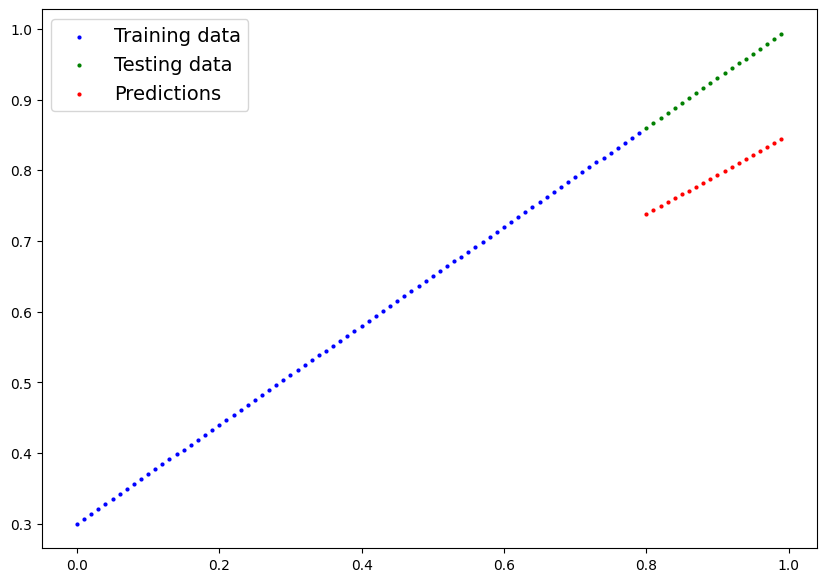

In [33]:
# Değerlendirme modunu açma
model_2.eval()

# Tahmin yapma (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Veriyi CPU'ya göndererek (matplotlib GPU üzerindeki verileri işleyemez) veriyi ve tahminleri görselleştirme
# (Aşağıdaki kodda .cpu()'yı birinden kaldırmayı deneyin ve ne olduğunu görün)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());


Tamam, modelimiz doğrusal çizgilerde rastgele tahminlerden çok daha iyi sonuçlar alabiliyor gibi görünüyor.

Bu iyi bir şey.

Bu, modelimizin en azından *bazı* desenleri öğrenme kapasitesine sahip olduğunu gösteriyor.

> **Not:** Derin öğrenme modelleri oluştururken, modeli büyütmeden önce küçük başlamak faydalı bir sorun giderme adımıdır.
>
> Bu, basit bir sinir ağı ile (çok katmanlı ve gizli nöronları olmayan) ve küçük bir veri seti (yaptığımız gibi) ile başlamak anlamına gelebilir. Ardından **overfitting** (modelin küçük örnek üzerinde çok iyi performans göstermesi) yaparak, verinin miktarını veya modelin boyutunu/birleşimini artırmadan önce **overfitting**'i azaltmaya çalışabilirsiniz.

Peki, sorun ne olabilir?

Bunu keşfedelim.


## 6. Eksik Parça: Doğrusal Olmayanlık (Non-linearity)

Modelimizin doğrusal (lineer) çizgiler çizebildiğini, doğrusal katmanları sayesinde gördük.

Ama ya ona doğrusal olmayan (non-linear) çizgiler çizme kapasitesini verirsek?

Nasıl mı?

Haydi bunu keşfedelim.


### 6.1 Doğrusal Olmayan Veriyi Yeniden Oluşturma (Kırmızı ve Mavi Daireler)

Öncelikle, veriyi baştan oluşturmak için temiz bir başlangıç yapalım. Daha önce kullandığımız aynı düzeni kullanacağız.


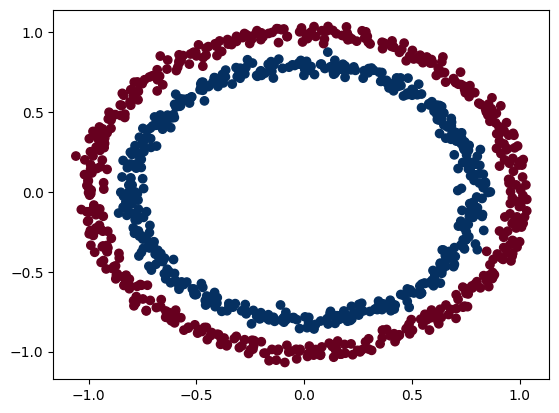

In [34]:
# Veri oluşturma ve görselleştirme
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


Harika! Şimdi veriyi %80 eğitim için ve %20 test için ayıralım.


In [35]:
# Tensörlere dönüştürme ve eğitim/test setlerine ayırma
import torch
from sklearn.model_selection import train_test_split

# Veriyi tensörlere dönüştürme
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Doğrusal Olmayanlık ile Bir Model Oluşturma

Şimdi eğlenceli kısma geldik.

Sonsuz sayıda doğrusal (doğru) ve doğrusal olmayan (doğrusal olmayan) çizgiyle ne tür bir desen çizebileceğinizi düşünüyorsunuz?

Bence oldukça yaratıcı olabilirsiniz.

Bugüne kadar sinir ağlarımız yalnızca doğrusal (doğru) çizgi fonksiyonları kullanıyordu.

Ancak üzerinde çalıştığımız veri **doğrusal olmayan** (daireler) veriydi.

Peki modelimize **doğrusal olmayan aktivasyon fonksiyonları** kullanma yeteneği eklediğimizde ne olacağını düşünüyorsunuz?

Haydi, görelim.

PyTorch, benzer ama farklı işler yapan bir dizi [hazır yapılmış doğrusal olmayan aktivasyon fonksiyonu](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) sunar.

Bunlardan en yaygın ve en iyi performans gösterenlerinden biri [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Bundan bahsetmek yerine, bunu sinir ağımıza **gizli katmanlar arasında** ileri geçişte ekleyelim ve ne olacağını görelim.


In [36]:
# Doğrusal Olmayan Aktivasyon Fonksiyonu ile Model Oluşturma
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # <- ReLU aktivasyon fonksiyonunu ekleyelim
        # Ayrıca sigmoid de modele eklenebilir
        # Bu durumda tahminler üzerinde sigmoid kullanmanıza gerek kalmaz
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # ReLU aktivasyon fonksiyonunu katmanlar arasında yerleştir
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [37]:
# Doğrusal Olmayan Aktivasyon Fonksiyonu ile Model Oluşturma
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # <- ReLU aktivasyon fonksiyonunu ekleyelim
        # Ayrıca sigmoid de modele eklenebilir
        # Bu durumda tahminler üzerinde sigmoid kullanmanıza gerek kalmaz
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # ReLU aktivasyon fonksiyonunu katmanlar arasında yerleştir
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![TensorFlow playground üzerinde ReLU aktivasyonu kullanan benzer bir sınıflandırma sinir ağının görsel örneği](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)  
*Az önce oluşturduğumuz (ReLU aktivasyonu kullanan) benzer bir sınıflandırma sinir ağının görsel örneği. Kendi modelinizi [TensorFlow Playground](https://playground.tensorflow.org/) sitesinde oluşturmayı deneyin.*

> **Soru:** *Sinir ağı oluştururken doğrusal olmayan aktivasyon fonksiyonlarını nereye yerleştirmeliyim?*  
>  
> Bir kılavuz olarak, aktivasyon fonksiyonlarını gizli katmanlar arasına ve çıkış katmanından hemen sonra yerleştirmek yaygın bir yöntemdir. Ancak kesin bir kural yoktur. Sinir ağları ve derin öğrenme hakkında daha fazla şey öğrendikçe, her şeyi birleştirmenin pek çok farklı yolunu keşfedeceksiniz. Şu anda, en iyisi **deneyin, deneyin, deneyin**.

Şimdi modelimiz hazır, haydi bir ikili sınıflandırma kayıp fonksiyonu ve optimizasyon algoritması oluşturalım.


In [38]:
# Kayıp fonksiyonu ve optimizasyon algoritmasını ayarlama
loss_fn = nn.BCEWithLogitsLoss()  # Sigmoid yerleşik olduğu için BCEWithLogitsLoss kullanıyoruz
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)  # Stokastik Gradyan İnişi (SGD)


### 6.3 Doğrusal Olmayanlık ile Modeli Eğitme

Her şey hazır: model, kayıp fonksiyonu ve optimizasyon algoritması. Şimdi bir eğitim ve test döngüsü oluşturalım.


In [39]:
# Modeli Eğitme
torch.manual_seed(42)
epochs = 1000

# Tüm veriyi hedef cihaza gönderme
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. İleri geçiş
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> tahmin olasılıkları -> tahmin etiketleri

    # 2. Kayıp ve doğruluk hesaplama
    loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss, logitler kullanarak kayıp hesaplar
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizasyon gradyanlarını sıfırlama
    optimizer.zero_grad()

    # 4. Kayıp üzerinden geri yayılım
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_3.eval()
    with torch.inference_mode():
      # 1. İleri geçiş
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))  # logits -> tahmin olasılıkları -> tahmin etiketleri
      # 2. Kayıp ve doğruluk hesaplama
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Durumları yazdırma
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Kayıp: {loss:.5f}, Doğruluk: {acc:.2f}% | Test Kayıp: {test_loss:.5f}, Test Doğruluğu: {test_acc:.2f}%")


Epoch: 0 | Kayıp: 0.69441, Doğruluk: 50.00% | Test Kayıp: 0.69360, Test Doğruluğu: 50.00%
Epoch: 100 | Kayıp: 0.69162, Doğruluk: 55.12% | Test Kayıp: 0.69052, Test Doğruluğu: 52.50%
Epoch: 200 | Kayıp: 0.69074, Doğruluk: 50.88% | Test Kayıp: 0.68922, Test Doğruluğu: 54.00%
Epoch: 300 | Kayıp: 0.68975, Doğruluk: 51.38% | Test Kayıp: 0.68775, Test Doğruluğu: 56.00%
Epoch: 400 | Kayıp: 0.68863, Doğruluk: 51.38% | Test Kayıp: 0.68614, Test Doğruluğu: 56.00%
Epoch: 500 | Kayıp: 0.68733, Doğruluk: 52.00% | Test Kayıp: 0.68439, Test Doğruluğu: 56.00%
Epoch: 600 | Kayıp: 0.68575, Doğruluk: 54.75% | Test Kayıp: 0.68246, Test Doğruluğu: 57.50%
Epoch: 700 | Kayıp: 0.68375, Doğruluk: 59.75% | Test Kayıp: 0.68028, Test Doğruluğu: 62.00%
Epoch: 800 | Kayıp: 0.68108, Doğruluk: 56.75% | Test Kayıp: 0.67768, Test Doğruluğu: 58.00%
Epoch: 900 | Kayıp: 0.67760, Doğruluk: 58.63% | Test Kayıp: 0.67459, Test Doğruluğu: 60.00%


### 6.4 Doğrusal Olmayan Aktivasyon Fonksiyonlarıyla Eğitilmiş Bir Modeli Değerlendirme

Verimizin dairesel (doğrusal olmayan) olduğunu hatırlayın mı? Şimdi, modelimizin doğrusal olmayan aktivasyon fonksiyonları ile eğitildikten sonra tahminlerinin nasıl göründüğüne bakalım.


In [40]:
# Tahminler Yapma
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]  # Tahminleri gerçek etiketlerle aynı formatta görmek istiyoruz


(tensor([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

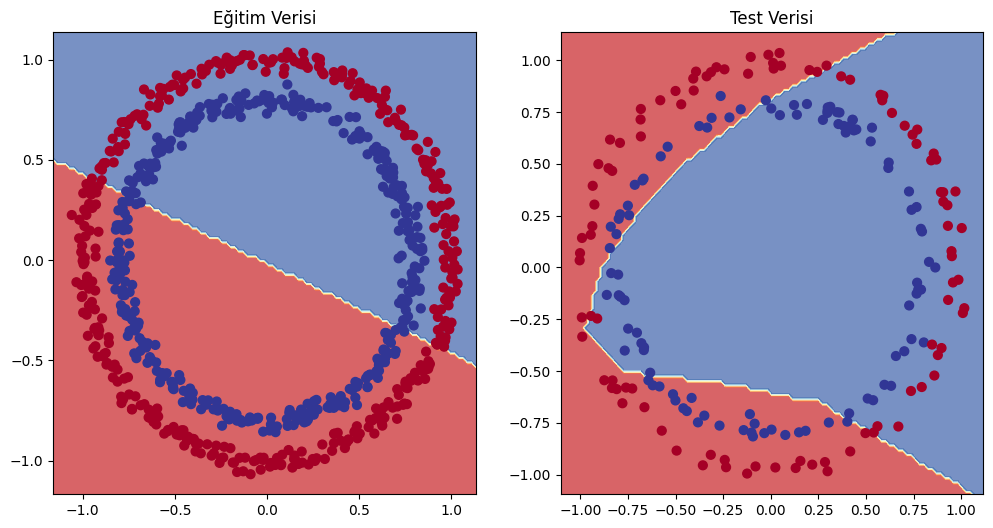

In [41]:
# Eğitim ve test setleri için karar sınırlarını görselleştirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Eğitim Verisi")
plot_decision_boundary(model_1, X_train, y_train)  # model_1 = doğrusal olmayanlık yok
plt.subplot(1, 2, 2)
plt.title("Test Verisi")
plot_decision_boundary(model_3, X_test, y_test)  # model_3 = doğrusal olmayanlık var


Harika! Mükemmel olmasa da, önceki duruma kıyasla çok daha iyi.

Test doğruluğunu artırmak için modeli iyileştirmek adına birkaç taktik deneyebilirsiniz? (ipucu: modelin iyileştirilmesiyle ilgili ipuçları için 5. bölüme dönün)


## 7. Doğrusal Olmayan Aktivasyon Fonksiyonlarını Taklit Etme

Önceden, doğrusal olmayan aktivasyon fonksiyonlarını modelimize eklemenin, doğrusal olmayan verileri modellemesine nasıl yardımcı olduğunu gördük.

> **Not:** Karşılaşacağınız verilerin çoğu doğrusal olmayan (veya doğrusal ve doğrusal olmayan kombinasyonları) olacaktır. Şu an 2D bir grafik üzerinde noktalarla çalışıyoruz. Ama ya sınıflandırmak istediğiniz bitki resimleriniz olsa, o zaman pek çok farklı bitki şekli vardır. Ya da Wikipedia'dan özetlemek istediğiniz metinler varsa, kelimelerin bir araya getirilme şekli çok farklı olabilir (doğrusal ve doğrusal olmayan desenler).

Ama doğrusal olmayan bir aktivasyon *neye benziyor*?

Haydi bazılarını taklit edelim ve ne yaptıklarını görelim.

Başlangıç olarak küçük bir veri seti oluşturalım.


In [42]:
# Basit Bir Tensör Oluşturma (Modelimize Giden Veriye Benzer)
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A


tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

Harika, şimdi bunu görselleştirelim.


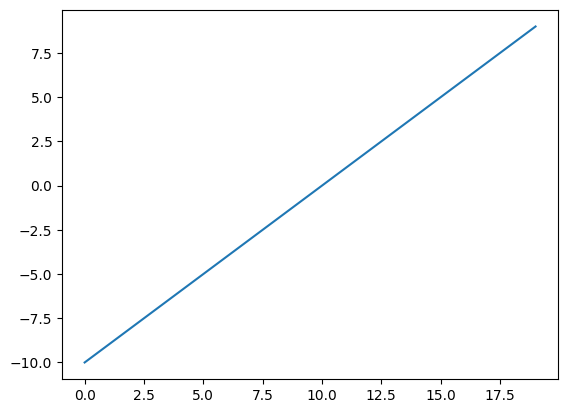

In [43]:
# Basit Tensörü Görselleştirme
plt.plot(A);


Bir doğru çizgi, harika.

Şimdi ReLU aktivasyon fonksiyonunun nasıl bir etki yarattığını görelim.

Ve PyTorch'un ReLU'su (`torch.nn.ReLU`) yerine, bunu kendimiz yeniden oluşturalım.

ReLU fonksiyonu, tüm negatif değerleri 0'a dönüştürür ve pozitif değerleri olduğu gibi bırakır.


In [44]:
# ReLU Fonksiyonunu Kendimiz Yapalım
def relu(x):
  return torch.maximum(torch.tensor(0), x)  # Girdi tensör olmalı

# Basit tensörü ReLU fonksiyonundan geçiriyoruz
relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Görünüşe göre ReLU fonksiyonumuz çalıştı, tüm negatif değerler sıfırlanmış.

Şimdi bunları görselleştirelim.


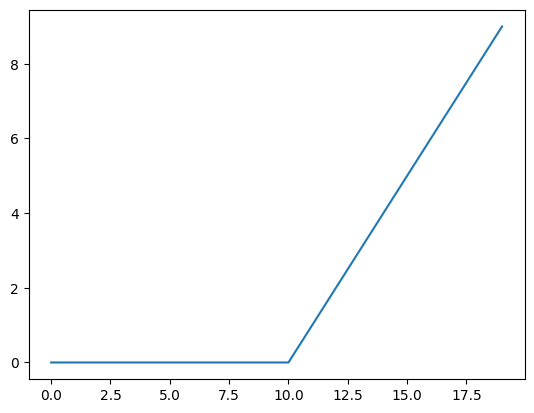

In [45]:
# ReLU ile aktive edilmiş basit tensörü görselleştirme
plt.plot(relu(A));


Harika! Bu, ReLU fonksiyonunun [Wikipedia sayfasındaki ReLU fonksiyonunun şekliyle](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) tam olarak aynı görünüyor.

Peki ya şimdi kullandığımız [sigmoid fonksiyonunu](https://en.wikipedia.org/wiki/Sigmoid_function) deneyelim?

Sigmoid fonksiyonunun formülü şu şekilde:

$$ out_i = \frac{1}{1+e^{-input_i}} $$

Ya da girdi olarak $x$ kullanarak:

$$ S(x) = \frac{1}{1+e^{-x_i}} $$

Burada $S$ sigmoid fonksiyonunu, $e$ [üs](https://en.wikipedia.org/wiki/Exponential_function) fonksiyonunu ([`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html)) ve $i$ tensördeki belirli bir öğeyi temsil eder.

Haydi, PyTorch ile sigmoid fonksiyonunu taklit edecek bir fonksiyon oluşturalım.


In [46]:
# Özel Sigmoid Fonksiyonu Oluşturma
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Özel Sigmoid fonksiyonunu toy tensör üzerinde test etme
sigmoid(A)


tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

Vay, bu değerler daha önce gördüğümüz tahmin olasılıklarına çok benziyor, haydi bunları görselleştirelim.


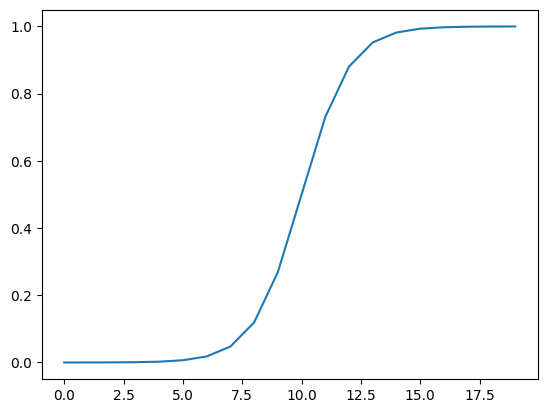

In [47]:
# Sigmoid ile aktive edilmiş basit tensörü görselleştirme
plt.plot(sigmoid(A));


Güzel görünüyor! Düz bir çizgiden eğri bir çizgiye geçtik.

Şimdi, PyTorch'ta daha pek çok [doğrusal olmayan aktivasyon fonksiyonu](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) var ve biz bunları henüz denemedik.

Ancak bu ikisi en yaygın olanlardan iki tanesi.

Ve asıl nokta şu, doğrusal (doğru) ve doğrusal olmayan (doğru olmayan) çizgiler kullanarak ne tür desenler çizebilirsiniz?

Neredeyse her şey, değil mi?

İşte modelimizin doğrusal ve doğrusal olmayan fonksiyonları birleştirerek yaptığı tam olarak bu.

Modelimize ne yapması gerektiğini söylemek yerine, verideki desenleri keşfetmek için en iyi yolu bulabilmesi için araçlar veriyoruz.

Ve bu araçlar doğrusal ve doğrusal olmayan fonksiyonlar.


## 8. Her Şeyi Birleştirerek Çoklu Sınıf PyTorch Modeli Oluşturma

Birçok konuyu ele aldık.

Ama şimdi her şeyi birleştirerek çoklu sınıf sınıflandırma problemiyle uygulayalım.

Bir **ikili sınıflandırma** problemi, bir şeyi iki seçenekten biri olarak sınıflandırmakla ilgilidir (örneğin, bir fotoğrafı kedi fotoğrafı veya köpek fotoğrafı olarak sınıflandırmak) whereas bir **çoklu sınıf sınıflandırma** problemi, bir şeyi *iki* seçenekten fazlası olan bir listeye sınıflandırmakla ilgilidir (örneğin, bir fotoğrafı kedi, köpek veya tavuk olarak sınıflandırmak).

![binary vs multi-class classification görseli, ikili sınıflandırma için köpek vs kedi örneği ve çoklu sınıf sınıflandırma için köpek vs kedi vs tavuk örneği](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)  
*İkili sınıflandırma vs çoklu sınıf sınıflandırma örneği. İkili sınıflandırma iki sınıfla ilgilidir (ya bir şey ya da başka bir şey), oysa çoklu sınıf sınıflandırma iki sınıftan fazla herhangi bir sayıda sınıfla ilgilidir. Örneğin, popüler [ImageNet-1k dataset](https://www.image-net.org/) bir bilgisayarla görsel benchmark olarak kullanılır ve 1000 sınıf içerir.*


### 8.1 Çoklu Sınıf Sınıflandırma Verisi Oluşturma

Bir çoklu sınıf sınıflandırma problemi başlatmak için, bazı çoklu sınıf verileri oluşturalım.

Bunu yapmak için, Scikit-Learn'ün [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) metodunu kullanabiliriz.

Bu yöntem, istediğimiz kadar sınıf oluşturacaktır (bu, `centers` parametresi ile yapılır).

Özellikle şunları yapalım:

1. `make_blobs()` ile bazı çoklu sınıf verileri oluşturalım.
2. Veriyi tensörlere dönüştürelim (çünkü `make_blobs()` varsayılan olarak NumPy dizileri kullanır).
3. Veriyi `train_test_split()` ile eğitim ve test setlerine ayıralım.
4. Veriyi görselleştirelim.


tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


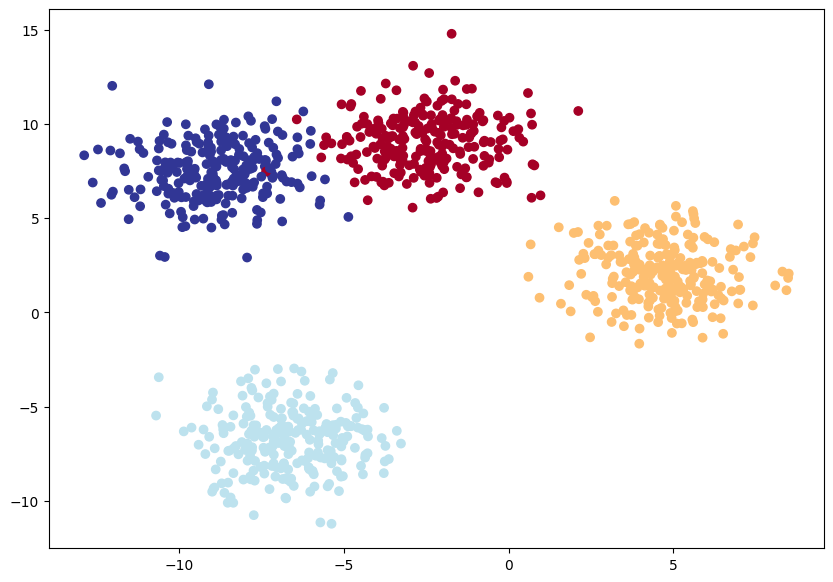

In [48]:
# Bağımlılıkları İçe Aktarma
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Veri oluşturma için hiperparametreleri ayarlama
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Çoklu sınıf verisi oluşturma
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES,  # X özellikleri
    centers=NUM_CLASSES,      # y etiketleri
    cluster_std=1.5,          # kümelere biraz sallama ekleme (bunu 1.0 yapmayı deneyin, varsayılan değeri)
    random_state=RANDOM_SEED
)

# 2. Veriyi tensörlere dönüştürme
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Eğitim ve test setlerine ayırma
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Veriyi görselleştirme
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


Harika! Görünüşe göre çoklu sınıf verimiz hazır.

Şimdi, renkli kümeleri ayıracak bir model oluşturalım.

> **Soru:** Bu veri seti doğrusal olmayanlık gerektiriyor mu? Yoksa kümeleri ayırmak için ardışık doğrular çizebilir miyiz?


### 8.2 PyTorch'ta Çoklu Sınıf Sınıflandırma Modeli Oluşturma

Şimdiye kadar PyTorch'ta birkaç model oluşturduk.

Sinir ağlarının ne kadar esnek olduğunu anlamaya başlıyorsunuz.

Peki ya `model_3`'e benzer bir model oluşturalım ama aynı zamanda çoklu sınıf verisini işleyebilecek şekilde olsun?

Bunu yapmak için, `nn.Module`'in bir alt sınıfını oluşturalım ve üç hiperparametre alacak şekilde tasarlayalım:
* `input_features` - modele gelen `X` özelliklerinin sayısı.
* `output_features` - ideal olarak istediğimiz çıkış özelliklerinin sayısı (bu, `NUM_CLASSES` veya çoklu sınıf sınıflandırma probleminizdeki sınıf sayısına eşdeğer olacaktır).
* `hidden_units` - her gizli katmanın kullanmasını istediğimiz gizli nöron sayısı.

Şimdi her şeyi birleştiriyoruz, o yüzden cihaz bağımsız kodu ayarlayalım (bunu aynı not defterinde tekrar yapmamıza gerek yok, sadece bir hatırlatma).

Sonra yukarıdaki hiperparametreleri kullanarak model sınıfını oluşturacağız.


In [49]:
# Cihaz Bağımsız Kod Oluşturma
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [50]:
from torch import nn

# Modeli Oluşturma
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Çoklu sınıf sınıflandırma modeli için gerekli tüm hiperparametreleri başlatır.

        Args:
            input_features (int): Modele gelen girdi özelliklerinin sayısı.
            output_features (int): Modelin çıkış özelliklerinin sayısı
              (sınıfların sayısı).
            hidden_units (int): Katmanlar arasındaki gizli birimlerin sayısı, varsayılan 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- Verimiz doğrusal olmayan katmanlar gerektiriyor mu? (yorum satırından çıkarmayı deneyin ve sonuçların değişip değişmediğine bakın)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- Verimiz doğrusal olmayan katmanlar gerektiriyor mu? (yorum satırından çıkarmayı deneyin ve sonuçların değişip değişmediğine bakın)
            nn.Linear(in_features=hidden_units, out_features=output_features), # Kaç tane sınıf var?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# BlobModel sınıfının bir örneğini oluşturun ve hedef cihaza gönderin
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

Harika! Çoklu sınıf modelimiz hazır, şimdi onun için bir kayıp fonksiyonu ve optimizasyon algoritması oluşturalım.

### 8.3 Çoklu Sınıf PyTorch Modeli İçin Kayıp Fonksiyonu ve Optimizasyon Algoritması Oluşturma

Çoklu sınıf sınıflandırma problemi üzerinde çalıştığımız için, kayıp fonksiyonu olarak `nn.CrossEntropyLoss()` metodunu kullanacağız.

Ve `model_4` parametrelerini optimize etmek için öğrenme oranı 0.1 olan SGD kullanmaya devam edeceğiz.


In [51]:
# Kayıp Fonksiyonu ve Optimizasyonu Oluşturma
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)  # egzersiz: Buradaki öğrenme oranını değiştirmeyi deneyin ve modelin performansına ne olduğunu görün


### 8.4 Çoklu Sınıf PyTorch Modeli İçin Tahmin Olasılıklarını Almak

Tamam, kayıp fonksiyonu ve optimizasyon algoritmamız hazır ve modelimizi eğitmeye hazırız. Ancak önce, modelimizle bir ileri geçiş yapalım ve düzgün çalışıp çalışmadığını görelim.


In [52]:
# Veride bir ileri geçiş yapma (çalışabilmesi için hedef cihaza göndermemiz gerekecek)
model_4(X_blob_train.to(device))[:5]


tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

Burada ne çıkıyor?

Görünüşe göre her örneğin her özelliği için bir değer alıyoruz.

Bunu doğrulamak için şekli kontrol edelim.


In [53]:
# Tek bir tahmin örneğinde kaç öğe var?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES


(torch.Size([4]), 4)

Harika, modelimiz her sınıf için bir değer tahmin ediyor.

Modelimizin ham çıktılarının ne adla anıldığını hatırlıyor musunuz?

İpucu: "frog splits" ile uyaklıdır (bu materyallerin oluşturulmasında hiçbir hayvan zarar görmemiştir).

Eğer *logits* dediyseniz, doğru tahmin ettiniz.

Şu anda modelimiz logits çıkartıyor, peki ya örneğe tam olarak hangi etiketi verdiğini öğrenmek istersek?

Yani, `logits -> tahmin olasılıkları -> tahmin etiketleri` dönüşümünü, tıpkı ikili sınıflandırma probleminde yaptığımız gibi nasıl yaparız?

İşte burada [softmax aktivasyon fonksiyonu](https://en.wikipedia.org/wiki/Softmax_function) devreye giriyor.

Softmax fonksiyonu, her tahmin sınıfının diğer tüm olası sınıflara kıyasla, gerçek tahmin edilen sınıf olma olasılığını hesaplar.

Eğer bu mantıklı gelmediyse, gelin kodda görelim.


In [54]:
# Model ile tahmin logits'lerini yapma
y_logits = model_4(X_test.to(device))

# Logitler üzerinde softmax hesaplaması yaparak tahmin olasılıklarını elde etme
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[ 0.2341, -0.3357,  0.2307,  0.2534],
        [ 0.1198, -0.3702,  0.0998,  0.1887],
        [ 0.3790, -0.2037,  0.4095,  0.2689],
        [ 0.1936, -0.3733,  0.1807,  0.2496],
        [ 0.1338, -0.1378,  0.1487,  0.0247]], grad_fn=<SliceBackward0>)
tensor([[0.2792, 0.1579, 0.2782, 0.2846],
        [0.2729, 0.1672, 0.2675, 0.2924],
        [0.2869, 0.1602, 0.2958, 0.2570],
        [0.2769, 0.1571, 0.2733, 0.2928],
        [0.2722, 0.2075, 0.2763, 0.2441]], grad_fn=<SliceBackward0>)


Hmm, burada ne oldu?

Softmax fonksiyonunun çıktıları hala karışık sayılar gibi görünüyor olabilir (ki öyledir, çünkü modelimiz henüz eğitilmedi ve rastgele desenler kullanarak tahmin yapıyor) ama her örnekte çok spesifik bir fark var.

Logitleri softmax fonksiyonundan geçirdikten sonra, her bir örnek artık 1'e (veya buna çok yakın bir değere) eşit oluyor.

Hadi bunu kontrol edelim.


In [55]:
# Softmax aktivasyon fonksiyonunun ilk örneği çıktısının toplamını alalım
torch.sum(y_pred_probs[0])


tensor(1., grad_fn=<SumBackward0>)

Bu tahmin olasılıkları, temelde modelin, hedef `X` örneğinin (girdi) her bir sınıfa ne kadar *ait* olduğunu düşündüğünü söylüyor.

Çünkü `y_pred_probs` içinde her sınıf için bir değer olduğundan, en yüksek değere sahip olan indeks, modelin belirli veri örneğinin *en çok* ait olduğu sınıfı temsil eder.

Hangi indeksin en yüksek değeri taşıdığını kontrol etmek için `torch.argmax()` kullanabiliriz.


In [56]:
# Model, indeks 0 örneğinde *en* olası sınıfın ne olduğunu düşünüyor?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))


tensor([0.2792, 0.1579, 0.2782, 0.2846], grad_fn=<SelectBackward0>)
tensor(3)


Gördüğünüz gibi, `torch.argmax()` çıktısı 3'ü döndürüyor, yani indeks 0 örneği için model, en olası sınıfın 3 olduğunu tahmin ediyor.

Tabii ki, şu anda bu sadece rastgele tahmin olduğu için doğru olma şansı %25 (çünkü dört sınıf var). Ancak modelimizi eğiterek bu şansı artırabiliriz.

> **Not:** Yukarıdaki açıklamayı özetlemek gerekirse, bir modelin ham çıktısı **logits** olarak adlandırılır.
>
> Çoklu sınıf sınıflandırma problemi için, logitleri **tahmin olasılıklarına** dönüştürmek için softmax aktivasyon fonksiyonu (`torch.softmax`) kullanılır.
>
> En yüksek **tahmin olasılığı** değerine sahip olan indeks, modelin bu örneğin giriş özelliklerine göre en olası sınıf numarasını gösterir (bu bir tahmindir, doğru olacağı garanti değildir).


### 8.5 Çoklu Sınıf PyTorch Modeli İçin Eğitim ve Test Döngüsü Oluşturma

Tamam, şimdi tüm hazırlık adımlarını tamamladık, hadi modelimizi geliştirmek ve değerlendirmek için bir eğitim ve test döngüsü yazalım.

Daha önce bu adımların çoğunu yaptık, bu yüzden çoğu pratik olacak.

Tek fark, model çıktılarımızı (logits) tahmin olasılıklarına (softmax aktivasyon fonksiyonunu kullanarak) ve sonra tahmin etiketlerine (softmax aktivasyon fonksiyonunun çıktısının argmax'ini alarak) dönüştüreceğiz.

Modeli `epochs=100` boyunca eğitelim ve her 10 epoch'ta bir değerlendirelim.


In [57]:
# Modeli Eğitme
torch.manual_seed(42)

# Epoch sayısını ayarlama
epochs = 100

# Veriyi hedef cihaza gönderme
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Eğitim
    model_4.train()

    # 1. İleri geçiş
    y_logits = model_4(X_blob_train)  # model ham logits'leri çıkarır
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # logits -> tahmin olasılıkları -> tahmin etiketleri
    # print(y_logits)
    # 2. Kayıp ve doğruluk hesaplama
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizasyon gradyanlarını sıfırlama
    optimizer.zero_grad()

    # 4. Kayıp üzerinden geri yayılım
    loss.backward()

    # 5. Optimizasyon adımı
    optimizer.step()

    ### Test
    model_4.eval()
    with torch.inference_mode():
      # 1. İleri geçiş
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Test kaybı ve doğruluğu hesaplama
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Durumları yazdırma
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Kayıp: {loss:.5f}, Doğruluk: {acc:.2f}% | Test Kayıp: {test_loss:.5f}, Test Doğruluğu: {test_acc:.2f}%")


Epoch: 0 | Kayıp: 1.04324, Doğruluk: 65.50% | Test Kayıp: 0.57861, Test Doğruluğu: 95.50%
Epoch: 10 | Kayıp: 0.14398, Doğruluk: 99.12% | Test Kayıp: 0.13037, Test Doğruluğu: 99.00%
Epoch: 20 | Kayıp: 0.08062, Doğruluk: 99.12% | Test Kayıp: 0.07216, Test Doğruluğu: 99.50%
Epoch: 30 | Kayıp: 0.05924, Doğruluk: 99.12% | Test Kayıp: 0.05133, Test Doğruluğu: 99.50%
Epoch: 40 | Kayıp: 0.04892, Doğruluk: 99.00% | Test Kayıp: 0.04098, Test Doğruluğu: 99.50%
Epoch: 50 | Kayıp: 0.04295, Doğruluk: 99.00% | Test Kayıp: 0.03486, Test Doğruluğu: 99.50%
Epoch: 60 | Kayıp: 0.03910, Doğruluk: 99.00% | Test Kayıp: 0.03083, Test Doğruluğu: 99.50%
Epoch: 70 | Kayıp: 0.03643, Doğruluk: 99.00% | Test Kayıp: 0.02799, Test Doğruluğu: 99.50%
Epoch: 80 | Kayıp: 0.03448, Doğruluk: 99.00% | Test Kayıp: 0.02587, Test Doğruluğu: 99.50%
Epoch: 90 | Kayıp: 0.03300, Doğruluk: 99.12% | Test Kayıp: 0.02423, Test Doğruluğu: 99.50%


### 8.6 PyTorch Çoklu Sınıf Modeli ile Tahminler Yapma ve Değerlendirme

Eğitilmiş modelimizin oldukça iyi performans gösterdiği görünüyor.

Ancak bunun doğru olduğundan emin olmak için, tahminler yapalım ve bunları görselleştirelim.


In [58]:
# Tahminler Yapma
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# İlk 10 tahmini görüntüleme
y_logits[:10]


tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

Tamam, görünüyor ki modelimizin tahminleri hala logit formunda.

Ancak değerlendirebilmek için, tahminlerimiz etiketlerimizle (`y_blob_test`) aynı formda olmalı, yani tam sayı formunda.

Modelimizin tahmin logitlerini tahmin olasılıklarına dönüştürmemiz gerekecek (bunu `torch.softmax()` ile yapacağız) ve ardından her örneğin `argmax()`'ini alarak tahmin etiketlerine dönüştüreceğiz.

> **Not:** `torch.softmax()` fonksiyonunu atlayıp doğrudan `predicted logits -> predicted labels` dönüşümünü yapmak mümkün, yani logitler üzerinde doğrudan `torch.argmax()` çağırabilirsiniz.
>
> Örneğin, `y_preds = torch.argmax(y_logits, dim=1)`, bu bir hesaplama adımını kaybettirir (softmax işlemi yapılmaz) ancak tahmin olasılıklarını kullanmak mümkün olmaz.


In [59]:
# Tahmin logitlerini tahmin olasılıklarına dönüştürme
y_pred_probs = torch.softmax(y_logits, dim=1)

# Tahmin olasılıklarını tahmin etiketlerine dönüştürme
y_preds = y_pred_probs.argmax(dim=1)

# İlk 10 model tahminlerini ve test etiketlerini karşılaştırma
print(f"Tahminler: {y_preds[:10]}\nEtiketler: {y_blob_test[:10]}")
print(f"Test doğruluğu: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Tahminler: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Etiketler: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test doğruluğu: 99.5%


Harika! Model tahminlerimiz artık test etiketlerimizle aynı formatta.

Şimdi bunları `plot_decision_boundary()` ile görselleştirelim. Verimiz GPU'da olduğu için, matplotlib ile kullanmadan önce veriyi CPU'ya taşımamız gerekecek (bu işlemi `plot_decision_boundary()` bizim için otomatik olarak yapar).


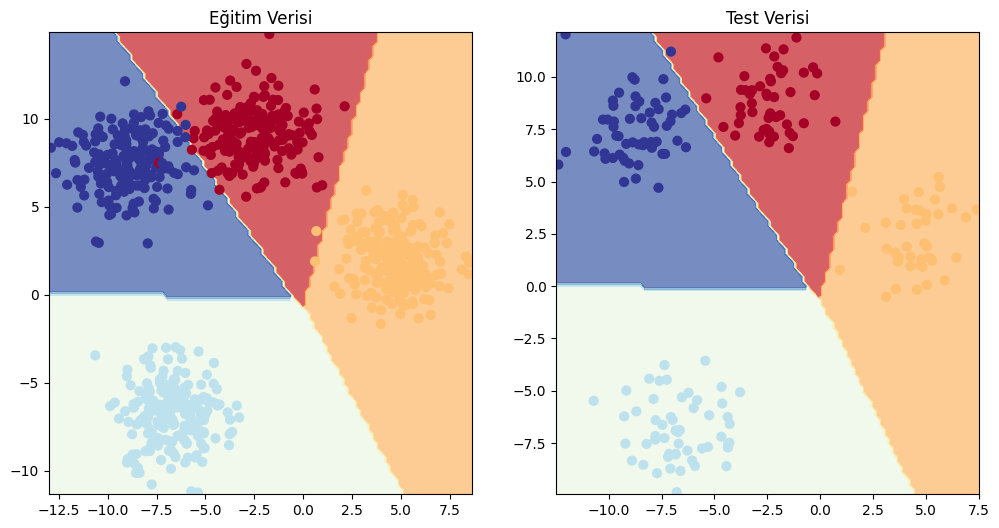

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Eğitim Verisi")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test Verisi")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


## 9. Daha Fazla Sınıflandırma Değerlendirme Metrikleri

Şu ana kadar sınıflandırma modelini değerlendirmek için birkaç yöntem üzerinde durduk (doğruluk, kayıp ve tahminlerin görselleştirilmesi).

Bunlar karşılaşacağınız en yaygın yöntemlerden bazılarıdır ve iyi bir başlangıç noktasıdır.

Ancak, sınıflandırma modelinizi aşağıdaki gibi daha fazla metrik kullanarak değerlendirmek isteyebilirsiniz:

| **Metrik adı/Evaluasyon yöntemi** | **Tanım** | **Kod** |
| --- | --- | --- |
| Doğruluk | 100 tahminden kaçı doğru? Örneğin, %95 doğruluk, 100 tahminden 95'inin doğru olduğunu gösterir. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#id3) veya [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Gerçek pozitiflerin, toplam örnek sayısına oranı. Daha yüksek precision, daha az yanlış pozitif sonuç (model, olması gereken 0 yerine 1 tahmin eder). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#id4) veya [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Gerçek pozitiflerin, gerçek pozitifler ve yanlış negatiflerin toplamına oranı (model, olması gereken 1 yerine 0 tahmin eder). Daha yüksek recall, daha az yanlış negatif sonuca yol açar. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#id5) veya [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-puanı | Precision ve recall'u tek bir metrikte birleştirir. 1 en iyi, 0 en kötü değerdir. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#f1score) veya [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Karışıklık matrisi](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Tahmin edilen değerleri ve gerçek değerleri tabular bir şekilde karşılaştırır. %100 doğruysa, matristeki tüm değerler sol üstten sağ alt köşeye kadar (diyagonal satır) olacaktır. | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#confusionmatrix) veya [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Sınıflandırma raporu | Precision, recall ve f1-score gibi bazı ana sınıflandırma metriklerinin topluluğu. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (popüler ve dünya çapında bir makine öğrenimi kütüphanesi) yukarıdaki metriklerin birçok uygulamasını sunuyor ve PyTorch benzeri bir sürüm arıyorsanız, [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/)'i kontrol edebilirsiniz, özellikle [TorchMetrics sınıflandırma bölümü](https://torchmetrics.readthedocs.io/en/latest/references/modules.html#classification).

Haydi, `torchmetrics.Accuracy` metriğini deneyelim.


In [62]:
# torchmetrics kütüphanesini kurduktan sonra doğruluk metriği ile doğruluk hesaplama

!pip -q install torchmetrics

from torchmetrics import Accuracy

# Metrik kurulumunu yapma ve hedef cihaza gönderme
torchmetrics_accuracy = Accuracy().to(device)

# Doğruluğu hesaplama
torchmetrics_accuracy(y_preds, y_blob_test)


TypeError: Accuracy.__new__() missing 1 required positional argument: 'task'